# Qubits and Quantum Circuits (an Introduction)
<hr></hr>

Quantum computers, or more precisely, quantum processing units (QPUs), are devices that exploit quantum-mechanical effects to speed up certain computational tasks when compared to conventional (classical) computers. In order to understand how these devices work, we must familiarize ourselves with the quantum phenomena that enables this added computational advantage. In particular, we must understand the concepts of [superposition](https://en.wikipedia.org/wiki/Quantum_superposition) and [entanglement](https://en.wikipedia.org/wiki/Quantum_entanglement).

Therefore, in this chapter we will first introduce the concept of a qubit by showing how this fundamental element of computation emerges from some of the physical properties of particles like electrons. This will lay the foundations needed to later discuss how QPUs can outperform classical devices when executing algorithms designed to exploit quantum effects.

## 1. Quantum Bits (Qubits)

From a computational standpoint, qubits are a generalization of classical bits and are the fundamental unit in quantum computing. There are many different ways in which we can introduce the concept of a qubit. Here, we will follow a relatively intuitive approach by looking at how electrons behave under the influence of an external magnetic field.

### 1.1 The Spin of an Electron

One of the fundamental properties of electrons is that they have an intrinsic angular momentum. This property is commonly known as spin, even though particles are not really spinning. The spin of an electron can be deduced experimentally by using what is known as a [Stern-Gerlach](https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment) apparatus. This device consists of two magnet poles shaped in a way such that the magnetic field between them is **non-uniform**, having a higher intensity at the top where the magnet is sharper: 

<img src="images/02_01_01_stern-gerlach_field.png" align = "center" width="600"/>

Therefore, if an object with a magnetic moment, like a tiny bar magnet, is sent into this device along the $y$ direction, it will experience a force in the vertical $z$ direction that will cause it to deflect upwards or downwards. A bar magnet with its north pole pointing up will deflect upwards. On the other hand, a bar magnet with its north pole pointing down will deflect downwards:

<img src="images/02_01_02_stern-gerlach_n-s_magnets.png" align = "center" width="700"/>

If designed correctly, a bar magnet with its north pointing in the $\texttt{+}x$ (or $\texttt{-}x$ direction) should experience an equal force from the top and bottom magnet poles, and therefore should travel in a straight path: 
<img src="images/02_01_03_stern-gerlach_straight_magnet.png" align = "center" width="300"/>


More generally, the force experienced by the bar magnet depends on the angle $\theta$ between its magnetic moment (i.e., where its north pole points to) and the direction of the external magnetic field. Therefore, if we were to perform this experiment for bar magnets with varying angles in the magnetic moment, the $z$-axis landing location on the back screen will vary between where the landing position of the up-pointing and down-pointing magnets, and will be dependent on the angle $\theta$.

<img src="images/02_01_04_stern-gerlach_diff_magnet.png" align = "center" width="320"/>

<a name="back1"></a> Now, because electrons are charge particles, their intrinsic angular momentum (spin) expresses itself as a magnetic moment just as we have for a tiny bar magnet. So, if we were to replace the magnets with electrons in the experiment above[$^*$](#footnote1), the expectation is that we should see the exact same behavior of electrons being deflected in the $z$ direction as a function of the angle between the electron's magnetic moment and the direction of the external magnetic field.

Experimentally, this has been confirmed for electrons with their spin pointing in the $\texttt{+}z$ and $\texttt{-}z$ directions. An electron with spin pointing up always deflects upwards, and an electron with a spin pointing down always deflects downwards:
<img src="images/02_01_05_stern-gerlach_up-down_elec.png" align = "center" width="700"/>

However, for the case of an electron with their spin pointing in, for example, the $\texttt{+}x$ (or $\texttt{-}x$) direction, something interesting happens. Instead of traveling in a straight line (like in the case of the bar magnet), the electron ends up deflecting upwards or downwards each with $50 \%$ probability:
<img src="images/02_01_06_stern-gerlach_right_elec.png" align = "center" width="360"/>

In other words, in an experiment where the electron is prepared to have spin in the $\texttt{±}x$ direction is performed many times, it has been verified that roughly half of the time the electron deflects upwards, and half of the time it deflects downwards and **never** somewhere in between.

And more generally, when an electron with its spin at an angle $\theta$ with respect to the $\texttt{+}z$ direction is sent into a Stern-Gerlach apparatus, the electron still only deflects either upwards or downwards with complimentary probabilities $p{\texttt{+}z}$ and $p{\texttt{-}z}$ that depend on this angle:

<img src="images/02_01_07_stern-gerlach_angle_elec.png" align = "center" width="320"/>

The reason why electrons show this probabilistic behavior is partially related to what is perhaps the most debated question in all quantum mechanics: [the measurement problem](https://en.wikipedia.org/wiki/Measurement_problem). Since discussions about the measurement problem are outside the scope of this textbook, we will simply use the empirical evidence from these experiments to build a model for how to describe these particles.

So, given this observed behavior, it is then very tempting to assign a probability vector (like the ones described in the [previous chapter](../01_classical_computing/01_04_probabilistic_circuits.ipynb)) to describe the state of the spin of an electron, where to first element in the vector represents the probability of the electron being spin up, and the second element the probability of being spin down:

$$ \vec{s} = \begin{bmatrix}\mathbb{P}_{\texttt{+}z} \\ \mathbb{P}_{\texttt{-}z} \end{bmatrix} $$

Clearly, this works for the specific case of the Stern-Gerlach experiment we described above, but does it work in general?... 
<p>
<div style="text-align: center;"> <strong> ¡No! </strong> </div>
</p>

To see why, let's first write what the probability vectors for a spin-up and spin-down electron in the $z$ direction would be:

$$
\vec{s}_{\texttt{+}z} = \begin{bmatrix}1 \\ 0 \end{bmatrix}, \quad \vec{s}_{\texttt{-}z} = \begin{bmatrix}0 \\ 1 \end{bmatrix}. 
$$

Now, for an electron with spin pointing in the $\texttt{+}x$ direction, the probability of measuring is spin up and spin down is $1/2$ each, so we have:

$$
\vec{s}_{\texttt{+}x} = \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix}.
$$

But what about an electron with spin in the $\texttt{-}x$ direction? Well, this would give us the exact same vector as above, which means there would be no way of distinguishing between two clearly different states:

$$
\vec{s}_{\texttt{-}x} = \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix}.
$$

One could argue that, perhaps, there is just simply no way to experimentally distinguish between electrons with spins along the $\texttt{+}x$ and $\texttt{-}x$ directions. However, it is not difficult to see that there is really nothing special about setting up the Stern-Gerlach apparatus with its varying field along the $z$ axis. We can perfectly rotate the device so the field is now in the $x$ direction. And, if we now send electrons with their spin along the $\texttt{+}x$ (or $\texttt{-}x$) axis, we will see them deflect to the right (or to the left) accordingly, which shows that there is indeed a way to experimentally tell these are two different states:

<img src="images/02_01_08_stern-gerlach_left-right_elec.png" align = "center" width="700"/>

Furthermore, we can also show that, mathematically, using probability vectors to describe spins simply doesn't work. An interesting fact about using vectors is that we can write one particular state as a linear combination of other states. For example, an electron with spin pointing in the $\texttt{+}x$ direction can be written as a linear combination of $\vec{s}_{\texttt{+}z}$ and $\vec{s}_{\texttt{-}z}$:

$$
\begin{aligned}
\vec{s}_{\texttt{+}x} &= \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix}
\\
\\
\vec{s}_{\texttt{+}x} &= \frac{1}{2} \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \frac{1}{2} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
\vec{s}_{\texttt{+}x} &= \frac{1}{2} \vec{s}_{\texttt{+}z} + \frac{1}{2} \vec{s}_{\texttt{-}z}.
\end{aligned}
$$

In words, this expression is simply saying that an electron with spin in the $\texttt{+}x$ can be viewed as probabilistically having either an electron with spin in the $\texttt{+}z$ direction or in the $\texttt{-}z$ direction, each with $50\%$ probability. By symmetry, we also know that if we send spin-up electrons through a rotated Stern-Gerlach apparatus, we will see them deflecting left or right, each with $50\%$ probability:

<img src="images/02_01_09_stern-gerlach_up_elec.png" align = "center" width="360"/>

This means that, for an electron with spin pointing in the $\texttt{+}z$ direction, we should also be able to write it as a linear combination of the vectors $\vec{s}_{\texttt{+}x}$ and $\vec{s}_{\texttt{-}x}$:

$$
\vec{s}_{\texttt{+}z} = \frac{1}{2} \vec{s}_{\texttt{+}x} + \frac{1}{2} \vec{s}_{\texttt{-}x}.
$$

But what happens if we replace $\vec{s}_{\texttt{+}x}$ and $\vec{s}_{\texttt{-}x}$ with their vector representation? Ideally, we should recover the vector expression for $\vec{s}_{\texttt{+}z}$, but this is what we get instead:

$$
\begin{aligned}
\vec{s}_{\texttt{+}z} &= \frac{1}{2} \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix} + \frac{1}{2} \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix}
\\
\\
\vec{s}_{\texttt{+}z} &= \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix} \color{#E53F73}{\leftarrow \text{incorrect vector values}} .
\end{aligned}
$$

Clearly, this not consistent with our original definition for $\vec{s}_{\texttt{+}z}$: 

$$ \vec{s}_{\texttt{+}z} = \begin{bmatrix}1 \\ 0 \end{bmatrix}. $$

This contradiction basically shows that probability vectors are not the right tool to represent how the spin of an electron behaves, so we need an alternative description. So let us now try to intuit how the mathematical object that describes the angular momentum of an electron would have to look like to match the results from these experiments.

### 1.2 From Probabilities to Probability Amplitudes

A key observation from the probabilistic model we proposed above is that, since the components $\mathbb{P}_{\texttt{+}z}$ and $\mathbb{P}_{\texttt{-}z}$ of the vector $\vec{s}$ are probabilities (which are numbers between $0$ and $1$ and must always add up to $1$), there is simply no way we can recover the original vector that describes $\vec{s}_{\texttt{+}z}$ by using linear combinations of other probability vectors. This is because the second entry in $\vec{s}_{\texttt{+}z}$ is a $0$, and there are no two positive numbers that can add up to it (unless they are both $0$). What this implies is that, for our maths to work, we need to also allow **negative** entries in our vectors. However, since these vectors still need to describe probabilistic experimental results (and probabilities cannot be negative), we need a new rule that tells us how to relate these new vector elements to probabilities. 

Well, a simple recipe to turn negative numbers into positive numbers is to square them, so we could propose to have the elements of our vectors to be numbers that when squared turn into the probabilities we see in experimental results! It is not hard to see that, a vector that would work in the case of the Stern-Gerlach experiment is given by:

$$ 
|s \rangle = \begin{bmatrix} s_0 \\ s_1 \end{bmatrix}, $$

<a name="back2"></a> where $s_0$ and $s_1$ are called the <span style="color:#a883f7">**probability amplitudes**</span> of vector $|s \rangle$ and which, when squared, represent the probabilities of measuring the electron to be spin up or spin down[$^{\dagger}$](#footnote2):

$$ \mathbb{P}_{\texttt{+}z} = s_0^2 \,, \quad \mathbb{P}_{\texttt{-}z} = s_1^2 .$$

<a name="back3"></a> This correspondence of measured probabilities being the square of probability amplitudes is known as the [Born rule](https://en.wikipedia.org/wiki/Born_rule). Also notice how we have switched back to using the [bra-ket](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation) notation for our vectors. This is because, as we pointed out when discussing the use of [vectors to represent bits](https://learnquantum.io/chapters/01_classical_computing/01_03_bits_to_vectors.html#single-bit-numbers-as-vectors), $|s \rangle $ belongs to a family of vectors (a vector space) with some specific properties, one of them being that the sum of their components squared must be equal to $1$, but we will go into these details in a later chapter[$^{\ddagger}$](#footnote3).

The key here is that, unlike what we had for the probability vector $\vec{s}$, this new definition does align with the observations of how the spin of electrons behaves. To see this, let's reconsider an electron with spin pointing in the $\texttt{+}z$ direction using this new definition:

$$ |s_{\texttt{+}z} \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}. $$

So far, this vector looks identical to what we had defined for $\vec{s}_{\texttt{+}z}$, but this is simply because:

$$ \mathbb{P}_{\texttt{+}z} = s_0^2 = 1^2 = 1 \quad \text{and} \quad \mathbb{P}_{\texttt{-}z} = s_1^2 = 0^2 = 0 .$$
    
Similarly, for an electron with its spin pointing the $\texttt{-}z$ direction we have:

$$ |s_{\texttt{-}z} \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, $$

which, again, is identical to $\vec{s}_{\texttt{-}z}$ because in this case:

$$ \mathbb{P}_{\texttt{+}z} = s_0^2 = 0^2 = 0 \quad \text{and} \quad \mathbb{P}_{\texttt{-}z} = s_1^2 = 1^2 = 1 .$$
    
But now let's look at the vector of an electron with spin in the $\texttt{+}x$ direction. Since we need to satisfy that the square of the probability amplitudes squared is equal to the probability of measuring the spin being deflected in the up or down direction (which are $50\%$ each) we have:

$$\mathbb{P}_{\texttt{+}z} = s_0^2 = \frac{1}{2} \quad \text{and} \quad \mathbb{P}_{\texttt{-}z} = s_1^2 = \frac{1}{2}.$$

So we can then arbitrarily choose $s_0$ and $s_1$ to both be the **positive** square root of $\frac{1}{2}$: 

$$s_0 = \frac{1}{\sqrt{2}} \quad \text{and} \quad  s_1 = \frac{1}{\sqrt{2}},$$

which gives us the following vector:

$$ 
|s_{\texttt{+}x} \rangle = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} .
$$

And as before, we can write this down as a linear combination of the vectors representing spin in the $\texttt{+}z$ and $\texttt{-}z$ directions:
    
$$ 
\begin{aligned}
|s_{\texttt{+}x} \rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
|s_{\texttt{+}x} \rangle &= \frac{1}{\sqrt{2}} |s_{\texttt{+}z} \rangle + \frac{1}{\sqrt{2}} |s_{\texttt{-}z} \rangle.
\end{aligned}
$$

Now, let's remember that the main motivation for us to switch from probabilities to probability amplitudes was that, based on the observed results when we rotated the Stern-Gerlach apparatus, $|s_{\texttt{+}z} \rangle$ should also be a valid linear combination of $|s_{\texttt{+}x} \rangle$ and $|s_{\texttt{-}x} \rangle$:

$$ |s_{\texttt{+}z} \rangle = \frac{1}{\sqrt{2}} |s_{\texttt{+}x} \rangle + \frac{1}{\sqrt{2}} |s_{\texttt{-}x} \rangle. $$
    
Therefore, to find the probability amplitudes of the vector for a spin in the $\texttt{-}x$ direction (denoted as $|s_{\texttt{-}x} \rangle$), we can simply replace $|s_{\texttt{+}z} \rangle$ and $|s_{\texttt{+}x} \rangle$ in the expression above, and find what $s_0$ and $s_1$ for the vector $|s_{\texttt{-}z} \rangle$ should be:

$$ 
\begin{aligned}
|s_{\texttt{+}z} \rangle &= \frac{1}{\sqrt{2}} |s_{\texttt{+}x} \rangle + \frac{1}{\sqrt{2}} |s_{\texttt{-}x} \rangle
\\
\\
\begin{bmatrix} 1 \\ 0 \end{bmatrix} &= \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} + \frac{1}{\sqrt{2}}\begin{bmatrix} s_0 \\ s_1 \end{bmatrix}
\\
\\
\begin{bmatrix} \sqrt{2} \\ 0 \end{bmatrix} &= \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} + \begin{bmatrix} s_0 \\ s_1 \end{bmatrix}
\\
\\
\begin{bmatrix} \sqrt{2} \\ 0 \end{bmatrix} - \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} &= \begin{bmatrix} s_0 \\ s_1 \end{bmatrix}
\\
\\
\begin{bmatrix} \phantom{-}\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} &= \begin{bmatrix} s_0 \\ s_1 \end{bmatrix} .
\end{aligned}
$$

Hence, we end up with the following vector:

$$ 
|s_{\texttt{-}x} \rangle = \begin{bmatrix} \phantom{-}\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix}
$$

From the expression above, we have that for the an electron with spin pointing in the $\texttt{-}x$ direction, the probability amplitudes are given by:

$$s_0 = \frac{1}{\sqrt{2}} \quad \text{and} \quad  s_1 = -\frac{1}{\sqrt{2}},$$

which gives us the correct probabilities of measurement:

$$\mathbb{P}_{\texttt{+}z} = s_0^2 = \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2} \quad \text{and} \quad \mathbb{P}_{\texttt{-}z} = s_1^2 = \left(-\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}.$$

In summary, the vectors that represent an electron with spins in the $\texttt{+}z$ and $\texttt{-}z$ direction are respectively given by:

$$ |s_{\texttt{+}z} \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \quad \text{and} \quad |s_{\texttt{-}z} \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}. $$

Similarly, for electrons with spin in the $\texttt{+}x$ and $\texttt{-}x$ directions we have:

$$ |s_{\texttt{-}x} \rangle = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} \quad \text{and} \quad |s_{\texttt{-}x} \rangle = \begin{bmatrix} \phantom{-}\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix}, $$

respectively. Furthermore, $|s_{\texttt{+}x} \rangle$ can be expressed as a linear combination of the $|s_{\texttt{+}z} \rangle$ and $|s_{\texttt{-}z} \rangle$ as follows:

$$ 
\begin{aligned}
|s_{\texttt{+}x} \rangle &= \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} 
\\
\\
|s_{\texttt{+}x} \rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
|s_{\texttt{+}x} \rangle &= \frac{1}{\sqrt{2}} |s_{\texttt{+}z} \rangle + \frac{1}{\sqrt{2}} |s_{\texttt{-}z} \rangle .
\end{aligned}
$$

And the language that we use to denote this expression is as follows: *the statevector* $|s_{\texttt{+}x} \rangle$ *corresponds to an equal* <span style="color:#a883f7">**superposition**</span> *of the statevectors* $|s_{\texttt{+}z} \rangle$ *and* $|s_{\texttt{-}z} \rangle$.

Similarly, we can also express $|s_{\texttt{-}x} \rangle$ as a **superposition** of states as:

$$
\begin{aligned}
|s_{\texttt{-}x} \rangle &= \begin{bmatrix} \phantom{-} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} 
\\
\\
|s_{\texttt{-}x} \rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \end{bmatrix} - \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
|s_{\texttt{-}x} \rangle &= \frac{1}{\sqrt{2}} |s_{\texttt{+}z} \rangle - \frac{1}{\sqrt{2}} |s_{\texttt{-}z} \rangle .
\end{aligned}
$$

Note something very important. In a lot of popular science-communication outlets, it is common to see the term **superposition** being referred as "*having two states at the same time*". But from our discussion above, it should be clear that, for example, the state $|s_{\texttt{+}x} \rangle$ is **not** like having both state $|s_{\texttt{+}z} \rangle$ and $|s_{\texttt{-}z} \rangle$ at the same time! $|s_{\texttt{+}x} \rangle$ is a state of its own, it is just that, in the **context** of measuring the spin of electrons along the $z$ direction, this state can be expressed as a linear combination of $|s_{\texttt{+}z} \rangle$ and $|s_{\texttt{-}z} \rangle$ with equal probability amplitudes.

### 1.3 Electron Spin as a Qubit

In a [previous chapter](../01_classical_computing/01_03_bits_to_vectors.ipynb), we discussed how we can represent classical bits and reversible circuits using vectors and matrices. More specifically, we denoted that the values a bit can take ($0$ and $1$) could be "upgraded" into the following two vectors:

$$ 
|0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\quad \text{ and } \quad
|1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix} .
$$

Well, it is not hard to see that these are exactly the same vectors we associated with the spin of an electron pointing in the $\texttt{+}z$ and $\texttt{-}z$ directions. But of course, we also saw that electrons can point in more than just these two directions. Specifically, we looked into the vector representation of the spin pointing in the $\texttt{+}x$ and $\texttt{-}x$ directions, which have no analog in the classical representation of binary systems (or even probability vectors). Instead, the elements of the spin vectors correspond probability amplitudes, which are a uniquely quantum effect. Therefore, we call these new type of vectors quantum bits or <span style="color:#a883f7">**qubits**</span> for short. 

So we are going to stick to the idea of spin representing a qubit, but we are going to make a few notational replacements. From now on, we will associate the spin-up of our electron with the vector symbol $|0 \rangle$ (referred as "state zero"), and spin-down with $|1 \rangle$ ("state one"). Similarly, we will express the along the $\texttt{+}x$ and $\texttt{-}x$ directions using two new symbols: $|+ \rangle$ and $|- \rangle$, which we call "state plus" and state minus", respectively. And like before, these two vectors correspond to **superposition** states of the states $|0 \rangle$, and $|1 \rangle$:

$$ 
\begin{aligned}
|+ \rangle &= \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = \frac{1}{\sqrt{2}}|0 \rangle + \frac{1}{\sqrt{2}}|1 \rangle 
\\
\\
|- \rangle &= \begin{bmatrix} \phantom{-} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} = \frac{1}{\sqrt{2}}|0 \rangle - \frac{1}{\sqrt{2}}|1 \rangle 
\end{aligned}
$$

But more generally, before we had that, for a classical bit vector representation given by the following expression:

$$ | b \rangle = \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}, $$

the coefficents $\beta_j$ were either $0$ or $1$, and had to meet the condition that:

$$ \beta_0^2 + \beta_1^2 = 1 .$$

And now, for a quantum vector (i.e., a **qubit**) we have:

$$ | q \rangle = \begin{bmatrix} q_0 \\ q_1 \end{bmatrix}, $$

where $q_j \in \mathbb{C}$, and:

$$ |q_0|^2 + |q_1|^2 = 1 .$$

In words, the coeffients of our qubit $| q \rangle$ are complex values whose norm squared must add up to $1$. At this point, this might seem like a lot to unpack because we have only seen these coefficients take positive and negative values (not complex), but in the next section we will see that there is a logical explanation of why they must be complex, and what this all means.

For now, let's keep focusing in the four states we've described so far and start implementing qubits in Python. In  previous chapters, we relied on NumPy arrays to implement vectors and matrices. And although we could do the same for qubits, let us now switch to Qiskit, which provides a much more convenient way to deal with these elements. Specifically, we will use a module within Qiskit called `quantum_info`, which has some easy-to-use classes to create and manipulate qubits, which we will refer to as Statevectors.

In [1]:
import numpy as np
from qiskit.quantum_info import Statevector

In [2]:
zero = Statevector([1, 0])                         # create state |0⟩
one = Statevector([1, 0])                          # create state |1⟩
plus = Statevector([np.sqrt(1/2), np.sqrt(1/2)])   # create state |+⟩
minus = Statevector([np.sqrt(1/2), -np.sqrt(1/2)]) # create state |-⟩

The `Statevector` class has many different methods to create (initialize) common states. In the cell above we created them by passing a list with the probability amplitudes for each of these components, but it is equally valid to created them using the `from_label` helper method:

In [3]:
zero = Statevector.from_label('0')
one = Statevector.from_label('1')
plus = Statevector.from_label('+')
minus = Statevector.from_label('-')

There are also a few different ways to display `Statevector` objects. For example, we can simply print the contents of a Statevector in text:

In [4]:
print('|0⟩ =', zero) # print Statevector object of |0⟩
print('|1⟩ =', one)  # print Statevector object of |1⟩

|0⟩ = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
|1⟩ = Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


Or display it's bra-ket or column vector representation it $\LaTeX$:

In [5]:
display(plus.draw('latex', prefix='|+ \\rangle = '))                       # display ket representation of |+⟩
display(minus.draw('latex', prefix='|- \\rangle = ', convention='vector')) # display vector representation of |-⟩

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One thing to note is that in Qiskit, column vectors are actually displayed as row vectors, but these should not be confused with the bra vectors we discussed before. So, when we see something like this being displayed:

$$ |- \rangle = 
\begin{bmatrix}
\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2}
 \end{bmatrix}, $$

it actually represents:

$$ 
\begin{aligned}
|- \rangle &= \begin{bmatrix} \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \end{bmatrix}^{\top} 
\\
\\
|- \rangle &= \begin{bmatrix} \phantom{-}\frac{\sqrt{2}}{2} \\ -\frac{\sqrt{2}}{2} \end{bmatrix}. 
 \end{aligned}
 $$

There are many other ways to create/initialize and display statevectors in Qiskit, but we will uncover these as we expand on the concept of a qubit in future chapters.

Before moving forward, one important thing to clarify is that the the spin of an electron is not the only physical property that can be viewed or used to implement a qubit. We have used this physical model (and will stick with it for a bit longer) because it maps very nicely to the vector representations we have discussed so far, but it is important to keep in mind that there are many other quantum systems that can be used to build universal quantum computing systems, such as [superconducting circuits](https://en.wikipedia.org/wiki/Superconducting_quantum_computing), [ion traps](https://en.wikipedia.org/wiki/Trapped-ion_quantum_computer), [neutral atoms](https://en.wikipedia.org/wiki/Neutral_atom_quantum_computer), amongst [many others](https://en.wikipedia.org/wiki/List_of_proposed_quantum_registers).

Let us now turn our attention at how we manipulate qubits using quantum circuits, which will be the next step towards understanding how these units of information bring an advantage when compared to their classical counterparts.

## 2. Quantum Circuits

Just like classical digital circuits, quantum circuits are an abstraction of physical operations that modify the state of a set of qubits. And, just like in the classical side, quantum circuits can be distilled into some basic operations represented by what we call **quantum gates**. Now, to understand this a bit better, it is useful to draw a parallel between the physical operations we apply to, let's say, the spin of an electron that represents our qubit, and the diagrammatic abstraction of our circuit.

So, let's look at the example below and describe step by step the relation between what happens to the spin of an electron, and the operation it would correspond to in a quantum circuit:

<img src="images/02_01_10_spin_vs_qubit_x.png" align = "center" width="750"/>

- We start at time $t_0$ with an electron for which we do not know where its spin is pointing to. In the circuit diagram we represent this state with with an arbitrary ket symbol $|?\rangle$.
- At time $t_1$, the electron goes through a Stern-Gerlach apparatus (labeled SG1). We know that due to the probabilistic nature of the spin of the electron, only spin-up or spin-down electrons will come out of SG1, each with some probability of occurrence. We can then set our experiment to have a screen that only detects spin-down electrons, in which case we will ignore the outcome and repeat the experiment. In the cases were we don't measure anything on the screen, we know we will have a spin-up electron coming out of this setup. In our circuit, we represent this operation with a block known as a post-selection gate (labeled as $|0\rangle \langle 0|$). All this gate represents is that, no matter what state goes into it, it only "spits out" state $|0\rangle$.
- Therefore, at $t_2$, we have only spin-up electrons in our physical setup, which in our circuit diagram we represent with a qubit in state $|0\rangle$. This step is commonly known as ground-state or zero-state **preparation**, and it is often assumed that it will take place before executing any circuit, so we usually don't need to explicitly specify it as a circuit operation.
- <a name="back4"></a>At time $t_3$, we have our electron go through another apparatus that applies a constant magnetic field to the electron, causing the direction of its spin to rotate. The details of how this works are not important for our current discussion, all we need to know is that, by varying the strength, direction and duration of this field, we can have the spin point in any direction we want[$^§$](#footnote4). In this particular example, we apply a field such that the electron spin rotates from being spin-up all the way to spin-down. In our circuit, this is represented with an $X$ gate, which should not be a surprise since we [already discussed](../01_classical_computing/01_02_reversible_computing.ipynb#1.1-Reversible-NOT) that this is equivalent to a **NOT** gate for classical reversible circuits.
- So, at time $t_4$ we have spin-down electrons, which in our circuit we represent with a qubit in state $|1\rangle$.
- Lastly, at $t_5$ we send our electron through another Stern-Gerlach device (SG2) but this time we have a full screen to detect if electrons are being deflected upwards or downwards. In our circuit, this is represented with what is known as a measurement gate, which takes as an input a quantum state, and provides as an output a classical bit corresponding to the state that was probabilistically measured.
- So, at time $t_6$, we will only **measure** electrons hitting the lower part of the screen, since all electrons coming into SG2 were spin-down. And in our circuit, we will see bit $1$ come out as a result every time we execute it.

In summary, a quantum circuit will consist of three steps:

 <span style="color:#a883f7">**1. State preparation**</span>, which almost always corresponds to preparing the ground state $|0\rangle$.

 <span style="color:#a883f7">**2. State transformation**</span>, which in the example above corresponded to applying an $X$ gate, but in general this will be a applying a combination of different quantum gates.

 <span style="color:#a883f7">**3. State measurement**</span>, where our quantum state gets probabilistically projected into classical information (bits) that we can interpret.

Let us now go ahead and create and display a quantum circuit that resembles what we have above using Qiskit:

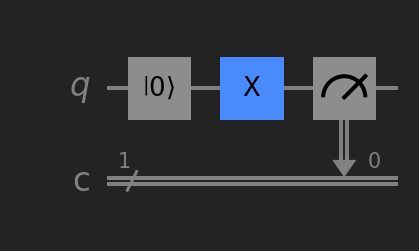

In [6]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1,1)  # Create circuit object with 1 qubit and 1 classical bit
qc.reset(0)               # Add state preparation gate (reset) to qubit 0
qc.x(0)                   # Add X gate to circuit to qubit 0
qc.measure(0,0)           # Add measurement gate between qubit 0 and bit 0
qc.draw()

As before, we have a gate to prepare our zero state (here denote with the symbol $|0\rangle$), an $X$ and a measurement gate. The only small difference is that we have separate circuit wires for our qubit $q$ and the measured bit $c$, which is denoted with double lines. This is just to keep the quantum and classical wires of information separate.

Let's first focus our attention on the $X$ gate alone. As described in the chapter on reversible computing, this gate corresponds to matrix that maps state $|0\rangle$ to state $|1\rangle$ and vice-versa. So let's extract the matrix for this particular gate in Qiskit using the `Operator` class:

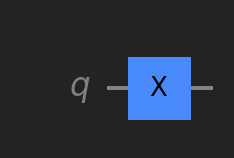

In [7]:
qc_x = QuantumCircuit(1)  # Create circuit object with 1 qubitt
qc_x.x(0)                   # Add X gate to circuit
qc_x.draw()

In [8]:
from qiskit.quantum_info import Operator

X = Operator(qc_x)
X.draw('latex', prefix='X =')

<IPython.core.display.Latex object>

As expected, we get the right matrix representation for this gate. We can also apply this gate to the quantum states we defined above over the gate as follows:

In [9]:
print('Evolution of state |0⟩ over an X gate results in:')
display(zero.evolve(qc_x))  # Evolving state |0⟩ over X should result in State |1⟩

print('Evolution of state |1⟩ over an X gate results in:')
display(one.evolve(qc_x))  # Evolving state |1⟩ over X should result in State |0⟩

Evolution of state |0⟩ over an X gate results in:


<IPython.core.display.Latex object>

Evolution of state |1⟩ over an X gate results in:


<IPython.core.display.Latex object>

Now, let's go back to our experiment and, instead of applying a magnetic field to flip the spin of the electron from spin-up to spin-down, let's assume we apply a different field that takes the spin from pointing in the $\text{+}z$ direction to the $\text{+}x$ direction:

<img src="images/02_01_11_spin_vs_qubit_h.png" align = "center" width="750"/>

The first portion of the experiment/circuit, where we prepare the spin-up electron remains the same (from $t_0$ to $t_2$). However, since we have now modified the field applied at $t_3$, we represent this in a circuit with a different gate. In this particular case, we have what is known as a **Hadamard gate**, which is one of the most important transformations we will find in quantum computing.

The Hadamard gate is special because it not only maps state $|0\rangle$ to state $|+\rangle$ (as we see at $t_4$, but it also does the reverse: maps state $|+\rangle$ to state $|0\rangle$. Similarly, it maps state $|1\rangle$ to state $|-\rangle$, and vice-versa. The matrix that performs these transformation is given by:

$$ H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix}, $$

which is equivalent to:

$$ H = \begin{bmatrix} \frac{\sqrt{2}}{2}  & \phantom{-}\frac{\sqrt{2}}{2}  \\ \frac{\sqrt{2}}{2}  & -\frac{\sqrt{2}}{\sqrt{2}}  \end{bmatrix}. $$

Now, continuing with our experiment/circuit, at $t_5$ we have the electron going into SG2, and as we saw before, gives us a $50\%$ chance of seeing the electron deflect upwards or downwards. In our circuit, this will be equivalent to measuring either a $0$ or a $1$, each with $50\%$ probability.


Let's again create a circuit in Qiskit, check it's matrix and the evolution of different states:

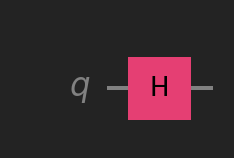

In [10]:
qc_h = QuantumCircuit(1)  # Create circuit object with 1 qubitt
qc_h.h(0)                 # Add H gate to circuit
qc_h.draw()

In [11]:
H = Operator(qc_h)
H.draw('latex', prefix='H =')

<IPython.core.display.Latex object>

In [12]:
print('Evolution of state |0⟩ over an X gate results in:')
display(zero.evolve(qc_h))  # Evolving state |0⟩ over X should result in State |+⟩

print('Evolution of state |1⟩ over an X gate results in:')
display(one.evolve(qc_h))  # Evolving state |1⟩ over X should result in State |-⟩

Evolution of state |0⟩ over an X gate results in:


<IPython.core.display.Latex object>

Evolution of state |1⟩ over an X gate results in:


<IPython.core.display.Latex object>

And, in case it isn't entirely obvious, we can apply a sequence of gates to obtain a desired output. For example, The state $|-\rangle$ can also be obtain from a circuit initialized in state $|0\rangle$, where we first apply and $X$ gate (to turn it to state $|1\rangle$, followed by an $H$ gate to get $|-\rangle$.

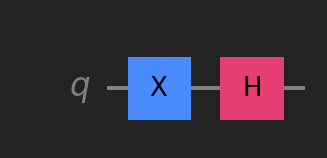

In [13]:
qc_xh = QuantumCircuit(1)  # Create circuit object with 1 qubitt

qc_xh.x(0)                 # Add X gate to circuit
qc_xh.h(0)                 # Add H gate to circuit
qc_xh.draw()

In [14]:
HX = Operator(qc_xh)
HX.draw('latex', prefix='H \\cdot X =')

<IPython.core.display.Latex object>

In [15]:
print('Result of applying X gate followed by an H gate to state |0⟩:')
display(Statevector(qc_xh))  # Passing a circuit to the Statevector class, always evolves state |0⟩

Result of applying X gate followed by an H gate to state |0⟩:


<IPython.core.display.Latex object>

Before wrapping up this section, let's see a couple of different ways in which we can perform measurements using Qiskit.

First, if we already have a `Statevector` object, we can use the `sample_counts` method to "emulate" as if the state was being measured. Here's an example we were sample state $|+\rangle$ 100 times. We should get $0$ or $1$ roughly half of the time each:

In [16]:
plus_counts = plus.sample_counts(100)
print(plus_counts)

{'0': 51, '1': 49}


Alternatively, if instead of just getting the number of times we got $0$ or $1$, we actually wanted the string of values obtained after each measurement, we can use the `sample_memory` method:

In [17]:
plus_samples = plus.sample_memory(100)
print(plus_samples)

['0' '1' '1' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '0'
 '1' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '1' '1' '0' '1' '1' '0' '0'
 '1' '0' '1' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '1'
 '1' '1' '1' '0' '0' '0' '1' '0' '1' '0' '1' '1' '0' '0' '1' '1' '1' '1'
 '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '0' '1' '1' '0' '1'
 '1' '0' '1' '1' '0' '1' '1' '1' '0' '1']


And if we were to do this for, let's say, state $|0\rangle$, we should obviously see $0$ $100\%$ of the time:

In [18]:
zero_counts = zero.sample_counts(100)
print(zero_counts)

{'0': 100}


In [19]:
zero_samples = zero.sample_memory(100)
print(zero_samples)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']


Now, using these `Statevector` methods is a convenient way to emulate the results, but if we want to simulate a circuit similar to what would be executed in real hardware, we need to add a measurement gate to our circuit as we did before, and run a simulation. Here's a simple way to do this in qiskit:

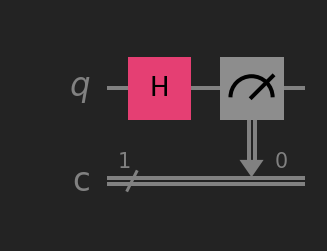

In [20]:
qc_hm = QuantumCircuit(1,1)  # Create circuit object with 1 qubitt
qc_hm.h(0)                   # Add H gate to circuit
qc_hm.measure(0,0)           # Add measurement gate between qubit 0 and bit 0
qc_hm.draw()

Notice how we did not add a `reset` gate like we did before. This is because in Qiskit, it is assumed that we always want to start a simulation with the state initialized at $|0\rangle$, therefore adding this gate is redundant. 

Now, to run our simulation, we need to import a simulator and execute the circuit a given number of "shots" (i.e., the number of times we want to run the simulation). For this, we will use the `BasicSimulator`.

In [21]:
from qiskit.providers.basic_provider import BasicSimulator

simulator = BasicSimulator()           # define simulator object
job = simulator.run(qc_hm, shots=100)  # use run method to execute our circuit some number of shots
result = job.result()                  # extract our results
counts = result.get_counts()           # get the counts from the experiment

print(counts)

{'0': 41, '1': 59}


And to visualize these results in a slightly nicer way, we can use the `plot_histogram` or function in Qiskit:

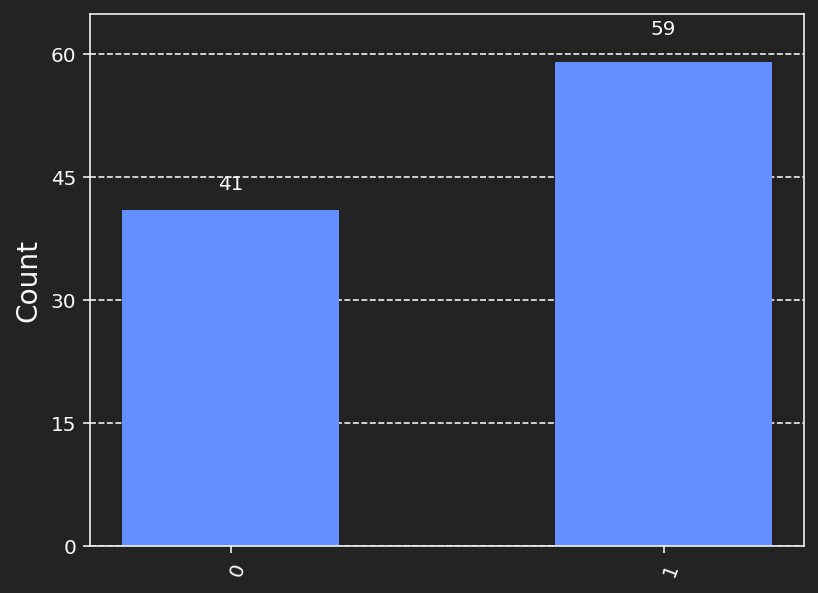

In [22]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

As expected, we get $0$ or $1$ about half of the time because, we started with state $|0\rangle$, applied a Hadamard gate, turning it into state $|+\rangle$, and then measured the qubit a 100 times.

Now that we have a basic idea of how what the physical representation of qubits and gates are, and how we can execute some simple simulations in Qiskit, in the next chapter we will generalize and present these ideas in a more formal way.

## Footnotes

<a name="footnote1"></a><span style="font-size: smaller;">$^*$Technically, we can't really perform the standard Stern-Gerlach experiment using just electrons. Since electrons are charged particles, accelerating them into the apparatus will cause a classical [Lorentz force](https://en.wikipedia.org/wiki/Lorentz_force) that will dominate over the effect the magnetic field has on spin. Instead, in the [original experiment](https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment#Description), silver atoms where used because they are electrically neutral but still have the same spin behavior as electrons (spin-1/2) due to the presence of an unpaired electron in the outermost orbital. ([go back](#back1))

<a name="footnote2"></a><span style="font-size: smaller;">$^{\dagger}$The choice of having $s_0^2$ and $s_1^2$ be the probabilities of measuring spin-up and spin-down is completely arbitrary. We could've equally selected them to be the probabilities of measuring spin-left or spin-right. The only restriction is that, once we pick what we want them to be, we need to stay consistent with this selection of axis of measurement when defining each and every vector. ([go back](#back2))</span>

<a name="footnote3"></a><span style="font-size: smaller;">$^{\ddagger}$Later we will see that, more generally, our vector components are complex numbers, so instead of just squaring them to find probabilities we must find the value of their norm squared, i.e., $|\alpha|^2 =  \alpha \cdot \alpha^*, \, \alpha \in \mathbb{C}$. ([go back](#back3))</span>

<a name="footnote4"></a><span style="font-size: smaller;">$^{§}$The feasibility of physically implementing such apparatus are of course debatable since in our setup we have the electron traveling in with some velocity but we would have to trap it, apply the magnetic field in the direction of interest, and then send it out it's way, which is not an easy task. But again, as mentioned before, we can't even perform a Stern-Gerlach experiment with a moving electron. At this point, the idea is to gain some intuition about what could be happening to the spin of an electron without having to worry to much about how exactly this could be realized. ([go back](#back4))</span>